In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphs to appear in notebook
%matplotlib inline


In [4]:
df = pd.read_csv("covid19.csv")
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes  # Optional: to check new data type of Date


Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

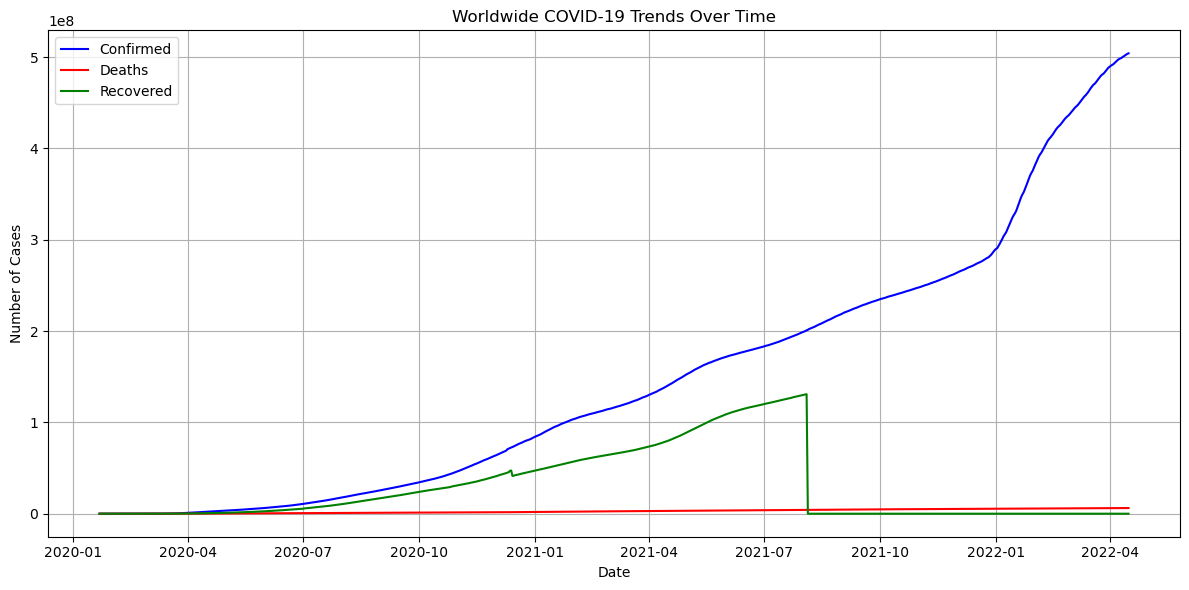

In [7]:
world = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()

plt.figure(figsize=(12,6))
plt.plot(world.index, world["Confirmed"], label="Confirmed", color='blue')
plt.plot(world.index, world["Deaths"], label="Deaths", color='red')
plt.plot(world.index, world["Recovered"], label="Recovered", color='green')

plt.title("Worldwide COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_7512\2491954244.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Confirmed", y="Country", data=top_confirmed, palette="Reds_r")


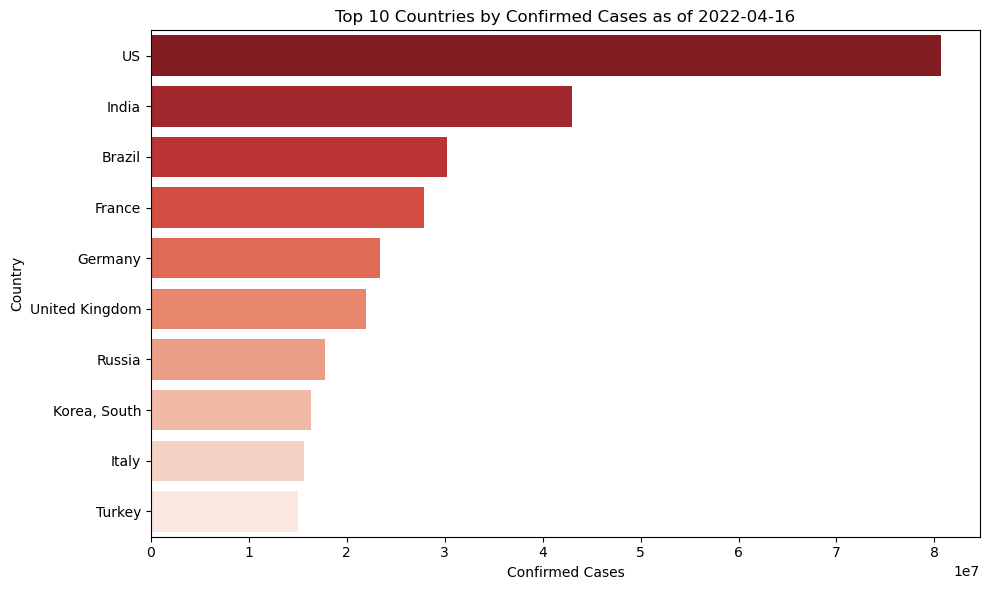

In [8]:
latest_date = df["Date"].max()

top_confirmed = (
    df[df["Date"] == latest_date]
    .sort_values(by="Confirmed", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x="Confirmed", y="Country", data=top_confirmed, palette="Reds_r")

plt.title(f"Top 10 Countries by Confirmed Cases as of {latest_date.date()}")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [9]:
# Avoid division by zero using .fillna(0)
df["MortalityRate"] = (df["Deaths"] / df["Confirmed"]).fillna(0)
df["RecoveryRate"] = (df["Recovered"] / df["Confirmed"]).fillna(0)

# Display the latest 10 entries for confirmation
df[["Country", "Date", "Confirmed", "Deaths", "Recovered", "MortalityRate", "RecoveryRate"]].tail(10)


,Country,Date,Confirmed,Deaths,Recovered,MortalityRate,RecoveryRate
161558,Zimbabwe,2022-04-07,246870,5455,0,0.022097,0.0
161559,Zimbabwe,2022-04-08,246925,5457,0,0.022100,0.0
161560,Zimbabwe,2022-04-09,246925,5457,0,0.022100,0.0
161561,Zimbabwe,2022-04-10,246958,5457,0,0.022097,0.0
161562,Zimbabwe,2022-04-11,247010,5460,0,0.022104,0.0
161563,Zimbabwe,2022-04-12,247094,5460,0,0.022097,0.0
161564,Zimbabwe,2022-04-13,247160,5460,0,0.022091,0.0
161565,Zimbabwe,2022-04-14,247208,5462,0,0.022095,0.0
161566,Zimbabwe,2022-04-15,247237,5462,0,0.022092,0.0
161567,Zimbabwe,2022-04-16,247237,5462,0,0.022092,0.0
